In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [21]:
df = pd.read_csv("../input/insurance.csv")

In [22]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


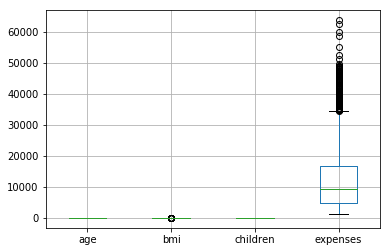

In [23]:
df.boxplot()

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
expenses    1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [25]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [26]:
df["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [27]:
df["sex"] = df.sex.replace({'male':1,'female':2})

In [28]:
df.smoker[df.smoker=='no']=2


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [29]:
df["smoker"] = df.smoker.replace({'yes'=1,'no'=2})

SyntaxError: invalid syntax (<ipython-input-29-cb5ebb5191a4>, line 1)

In [30]:
df.smoker[df.smoker=='yes'] = 1
df.smoker[df.smoker=='2']=2

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [39]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,2,27.9,0,1,2,16884.92
1,18,1,33.8,1,2,1,1725.55
2,28,1,33.0,3,2,1,4449.46
3,33,1,22.7,0,2,3,21984.47
4,32,1,28.9,0,2,3,3866.86


In [32]:
df["region"].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

In [38]:
df["region"] = df.region.replace({'southeast':1,'southwest':2,'northwest':3,'northeast':4})

TypeError: Cannot compare types 'ndarray(dtype=int64)' and 'str'

In [66]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

ValueError: color kwarg must have one color per data set. 1 data sets and 1338 colors were provided

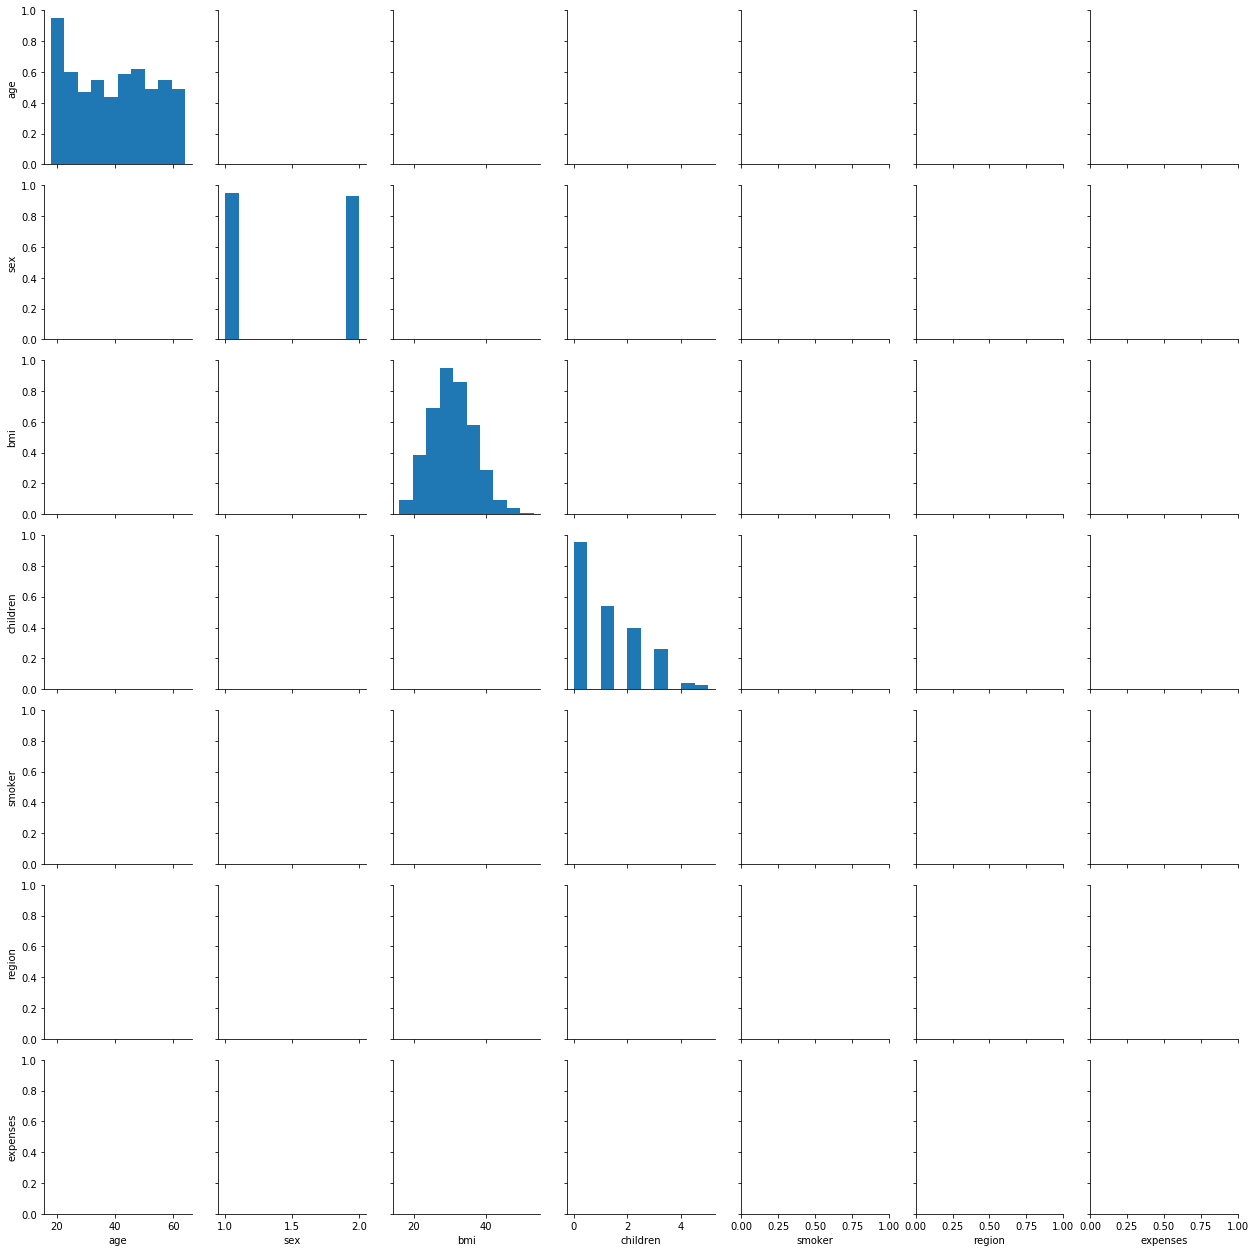

In [67]:
sns.pairplot(data = df)
plt.show()

In [42]:
df.corr()

,age,sex,bmi,children,region,expenses
age,1.000000,0.020856,0.109341,0.042469,0.006308,0.299008
sex,0.020856,1.000000,-0.046380,-0.017163,0.012816,-0.057292
bmi,0.109341,-0.046380,1.000000,0.012645,-0.262750,0.198576
children,0.042469,-0.017163,0.012645,1.000000,0.001205,0.067998
region,0.006308,0.012816,-0.262750,0.001205,1.000000,-0.039473
expenses,0.299008,-0.057292,0.198576,0.067998,-0.039473,1.000000


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null int64
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null int64
expenses    1338 non-null float64
dtypes: float64(2), int64(4), object(1)
memory usage: 73.2+ KB


In [44]:
y = df["expenses"]
x =  df.drop(columns=["expenses","sex","region"])

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [46]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3,random_state = 42)

In [47]:
train_x.shape

(936, 4)

In [48]:
test_x.shape

(402, 4)

In [49]:
lm = LinearRegression()
lm.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

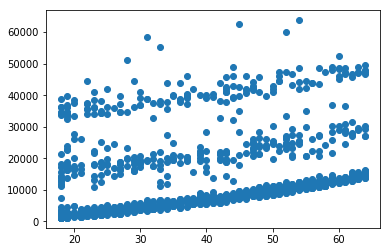

In [50]:
plt.scatter(x["age"],y)

In [51]:
lm.intercept_

34779.29941768743

In [52]:
lm.coef_

array([   261.83550993,    333.48413414,    433.50053834, -23626.09861577])

In [53]:
train_predict = lm.predict(train_x)

In [54]:
test_predict = lm.predict(test_x)

In [55]:
train_predict

array([ 1.39037733e+04,  8.77569775e+03,  1.36048652e+04,  3.57921168e+04,
        3.37396177e+04,  3.55315954e+04,  6.21046941e+03,  5.60656034e+03,
        1.68347095e+04,  7.89137364e+03,  3.78190947e+04,  5.29291223e+03,
        8.11493777e+03,  1.06368564e+04,  3.03540019e+04,  4.96918751e+03,
        3.27715204e+03,  1.60912273e+04,  3.27709436e+03,  6.34386307e+03,
        9.80583210e+03, -5.94901548e+02,  2.97549581e+04,  8.04692678e+03,
        1.04407084e+04,  5.89682130e+03,  8.00630310e+03,  1.18892696e+04,
        2.92646932e+04,  9.85269290e+03,  1.10816901e+04,  6.01535957e+03,
        4.06620969e+03,  1.34789586e+03,  8.14831502e+03,  1.14250201e+04,
        1.06270393e+04,  8.97444522e+03,  5.93995797e+03,  4.42090169e+03,
        7.15648088e+03,  3.40037767e+04,  3.35405654e+04,  3.47360489e+03,
        4.01693484e+04,  2.87856172e+04,  1.12989306e+04,  4.30731522e+03,
        1.70669208e+04,  3.87378585e+03,  9.48955565e+03,  2.96711113e+04,
        1.65616562e+04,  

In [59]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
print("MSE : ", mean_squared_error(train_y,train_predict))
print("R2 : " ,r2_score(train_y,train_predict))

MSE :  37881118.33504438
R2 :  0.7413700145321982
